### FashionMNIST classifier based on neural networks

-FashionMNIST is a dataset of grayscale images of 28x28 pixels representing 10 categories of clothing items.

-This notebook uses linear networks and CNN to classify the ten categories of FashionMNIST and compares the results.

### 运行说明：
### 该笔记需要python环境，环境中需确保有torch  matplotlib  torchvision库

==============================================================================================================================================================

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

In [30]:
# 数据预处理和加载
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载训练集和测试集
train_dataset = FashionMNIST(root='fmnist_data/', train=True, transform=transform, download=True)
test_dataset = FashionMNIST(root='fmnist_data/', train=False, transform=transform, download=True)

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [31]:
# This cell is for demo purposes. feel free to remove it if you want.
print('Number of classes in dataset:', len(train_dataset.classes))
print('Unique labels:', train_dataset.classes)

Number of classes in dataset: 10
Unique labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [32]:
# 定义神经网络模型
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

# 初始化模型、损失函数和优化器
model = FashionMNISTNet().to(device)  # 将模型移到GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练函数
def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # 将数据移到GPU
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# 测试函数
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            # 将数据移到GPU
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [33]:
# 训练模型
epochs = 30
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    train_loss = train(model, train_loader, criterion, optimizer)
    test_accuracy = test(model, test_loader)
    train_losses.append(train_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.2f}%')

Epoch 1/30:
Training Loss: 0.5146
Test Accuracy: 83.87%
Epoch 2/30:
Training Loss: 0.3970
Test Accuracy: 85.40%
Epoch 3/30:
Training Loss: 0.3632
Test Accuracy: 86.69%
Epoch 4/30:
Training Loss: 0.3413
Test Accuracy: 87.09%
Epoch 5/30:
Training Loss: 0.3272
Test Accuracy: 87.83%
Epoch 6/30:
Training Loss: 0.3112
Test Accuracy: 88.03%
Epoch 7/30:
Training Loss: 0.3048
Test Accuracy: 87.02%
Epoch 8/30:
Training Loss: 0.2920
Test Accuracy: 88.00%
Epoch 9/30:
Training Loss: 0.2839
Test Accuracy: 88.30%
Epoch 10/30:
Training Loss: 0.2757
Test Accuracy: 87.81%
Epoch 11/30:
Training Loss: 0.2702
Test Accuracy: 88.39%
Epoch 12/30:
Training Loss: 0.2626
Test Accuracy: 88.30%
Epoch 13/30:
Training Loss: 0.2555
Test Accuracy: 88.76%
Epoch 14/30:
Training Loss: 0.2521
Test Accuracy: 89.07%
Epoch 15/30:
Training Loss: 0.2417
Test Accuracy: 89.05%
Epoch 16/30:
Training Loss: 0.2393
Test Accuracy: 88.36%
Epoch 17/30:
Training Loss: 0.2373
Test Accuracy: 89.28%
Epoch 18/30:
Training Loss: 0.2294
Test 

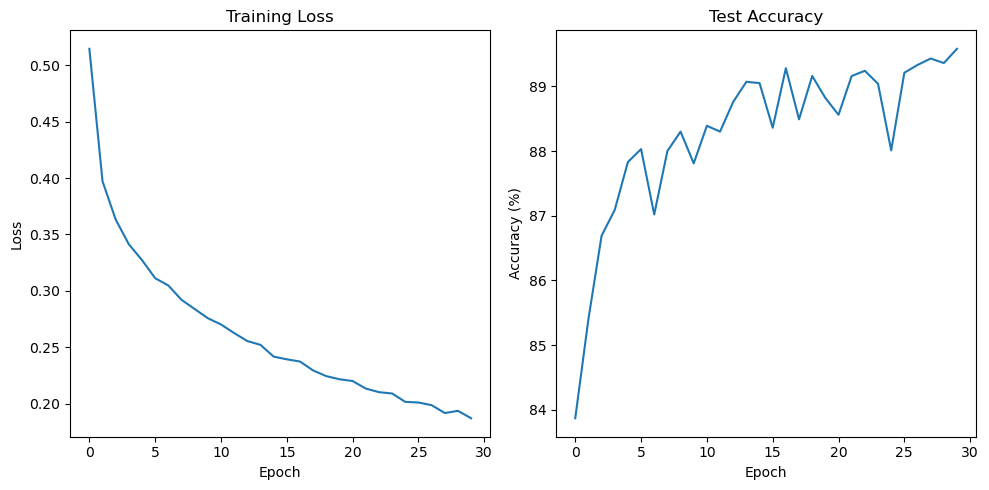

In [34]:
# 绘制训练损失曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 绘制测试准确率曲线
plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

In [35]:
# 定义改进的CNN模型
class ImprovedFashionMNISTNet(nn.Module):
    def __init__(self):
        super(ImprovedFashionMNISTNet, self).__init__()
        
        # 第一个卷积块
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # 第二个卷积块
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # 第三个卷积块
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # 全连接层
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        return x

# 初始化模型、损失函数和优化器
model = ImprovedFashionMNISTNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)

In [36]:
# 训练模型
epochs = 30
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    train_loss = train(model, train_loader, criterion, optimizer)
    test_accuracy = test(model, test_loader)
    train_losses.append(train_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.2f}%')

Epoch 1/30:
Training Loss: 0.3929
Test Accuracy: 89.18%
Epoch 2/30:
Training Loss: 0.2478
Test Accuracy: 91.05%
Epoch 3/30:
Training Loss: 0.2066
Test Accuracy: 91.80%
Epoch 4/30:
Training Loss: 0.1821
Test Accuracy: 91.93%
Epoch 5/30:
Training Loss: 0.1594
Test Accuracy: 92.55%
Epoch 6/30:
Training Loss: 0.1409
Test Accuracy: 92.50%
Epoch 7/30:
Training Loss: 0.1223
Test Accuracy: 92.70%
Epoch 8/30:
Training Loss: 0.1068
Test Accuracy: 92.70%
Epoch 9/30:
Training Loss: 0.0955
Test Accuracy: 92.55%
Epoch 10/30:
Training Loss: 0.0808
Test Accuracy: 92.76%
Epoch 11/30:
Training Loss: 0.0702
Test Accuracy: 93.04%
Epoch 12/30:
Training Loss: 0.0624
Test Accuracy: 92.91%
Epoch 13/30:
Training Loss: 0.0566
Test Accuracy: 92.55%
Epoch 14/30:
Training Loss: 0.0513
Test Accuracy: 92.58%
Epoch 15/30:
Training Loss: 0.0474
Test Accuracy: 92.81%
Epoch 16/30:
Training Loss: 0.0448
Test Accuracy: 92.56%
Epoch 17/30:
Training Loss: 0.0404
Test Accuracy: 92.23%
Epoch 18/30:
Training Loss: 0.0343
Test 

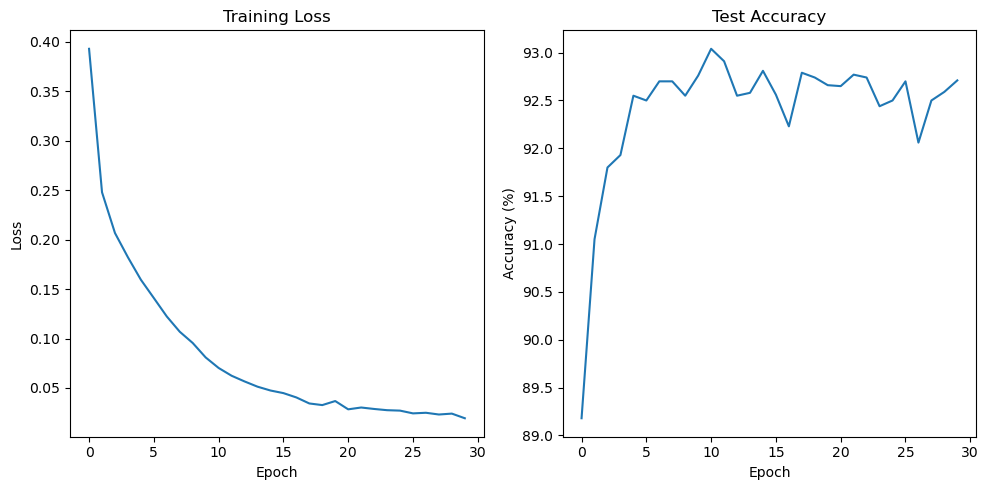

In [37]:
# 绘制训练损失曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 绘制测试准确率曲线
plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()